In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from word2number import w2n 

In [2]:
df = pd.read_csv("linearRegression.csv")
type(df["year"])

pandas.core.series.Series

<AxesSubplot:xlabel='year', ylabel='per capita income (US$)'>

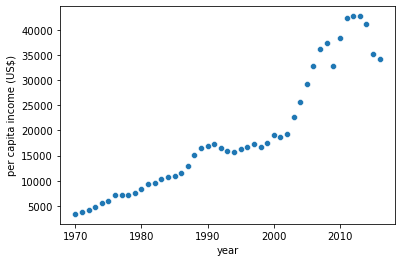

In [3]:
sns.scatterplot(x = df["year"], y = df["per capita income (US$)"])

In [18]:
reg = linear_model.LinearRegression()
reg.fit(df[["year"]], df["per capita income (US$)"])
type(reg)

sklearn.linear_model._base.LinearRegression

In [5]:
reg.predict([[2020]])

array([41288.69409442])

# Machine Learning CodeBasics Exercise 2

In [6]:
df_hiring = pd.read_csv("hiring.csv")
df_hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [7]:
df_hiring["experience"] = df_hiring["experience"].fillna("zero")
df_hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [8]:
df_hiring["experience"] = df_hiring["experience"].apply(w2n.word_to_num)
df_hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [9]:
df_hiring["test_score(out of 10)"] = df_hiring["test_score(out of 10)"].fillna(df_hiring["test_score(out of 10)"].median())
df_hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [10]:
reg = linear_model.LogisticRegression(max_iter=400)
reg.fit(df_hiring[["experience", "test_score(out of 10)","interview_score(out of 10)"]],df_hiring["salary($)"])

LogisticRegression(max_iter=400)

In [11]:
reg.predict([[12,10,10]])

array([80000], dtype=int64)

# Gradient Descent

In [12]:

def  gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.001
    for i in range(iterations):
        y_predicted = m_curr*x + b_curr
        md = -(2/n)*sum(x*(y-y_predicted))
        mb = -(2/n)*sum(y - y_predicted)
        cost = (1/n)*sum([val**2 for val in (y - y_predicted)])
        m_curr = m_curr - learning_rate*md
        b_curr = b_curr - learning_rate*mb
        print("m {}, b {}, cost {}, iterations {}".format(m_curr, b_curr, cost, i))
    



x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])
gradient_descent(x,y)

m 0.062, b 0.018000000000000002, cost 89.0, iterations 0
m 0.122528, b 0.035592000000000006, cost 84.881304, iterations 1
m 0.181618832, b 0.052785648000000004, cost 80.955185108544, iterations 2
m 0.239306503808, b 0.069590363712, cost 77.21263768455901, iterations 3
m 0.29562421854195203, b 0.086015343961728, cost 73.64507722605434, iterations 4
m 0.35060439367025875, b 0.10206956796255283, cost 70.2443206760065, iterations 5
m 0.40427867960173774, b 0.11776180246460617, cost 67.00256764921804, iterations 6
m 0.4566779778357119, b 0.13310060678206653, cost 63.912382537082294, iterations 7
m 0.5078324586826338, b 0.14809433770148814, cost 60.966677449199324, iterations 8
m 0.5577715785654069, b 0.16275115427398937, cost 58.15869595270883, iterations 9
m 0.606524096911324, b 0.17707902249404894, cost 55.481997572035766, iterations 10
m 0.6541180926443106, b 0.1910857198675929, cost 52.9304430134884, iterations 11
m 0.7005809802869303, b 0.20477883987199186, cost 50.49818008081245, iter

m 2.5454491636212873, b 1.0303378330994661, cost 0.7066059813975979, iterations 421
m 2.545267255023022, b 1.0310044624515395, cost 0.7061282534517551, iterations 422
m 2.5450853486378064, b 1.0316708499964984, cost 0.7056508488197332, iterations 423
m 2.5449034458677957, b 1.0323369962046784, cost 0.705173767267401, iterations 424
m 2.544721548081476, b 1.0330029015370623, cost 0.7046970085615132, iterations 425
m 2.5445396566144614, b 1.0336685664454994, cost 0.7042205724696756, iterations 426
m 2.54435777277027, b 1.0343339913729217, cost 0.7037444587603117, iterations 427
m 2.544175897821087, b 1.0349991767535542, cost 0.7032686672026311, iterations 428
m 2.543994033008502, b 1.0356641230131207, cost 0.7027931975665994, iterations 429
m 2.543812179544236, b 1.0363288305690435, cost 0.702318049622908, iterations 430
m 2.5436303386108485, b 1.03699329983064, cost 0.7018432231429538, iterations 431
m 2.543448511362426, b 1.0376575311993135, cost 0.7013687178988018, iterations 432
m 2.

m 2.4757318789288796, b 1.2824569425216528, cost 0.5373065271429376, iterations 826
m 2.4755710359373144, b 1.283037637363036, cost 0.5369432659607325, iterations 827
m 2.4754102473225155, b 1.2836181358726861, cost 0.5365802503714603, iterations 828
m 2.475249513066184, b 1.2841984381170057, cost 0.5362174802090827, iterations 829
m 2.475088833150026, b 1.2847785441623747, cost 0.5358549553076719, iterations 830
m 2.474928207555751, b 1.2853584540751497, cost 0.5354926755014108, iterations 831
m 2.4747676362650735, b 1.2859381679216648, cost 0.5351306406245974, iterations 832
m 2.4746071192597117, b 1.286517685768231, cost 0.5347688505116402, iterations 833
m 2.4744466565213887, b 1.2870970076811363, cost 0.5344073049970594, iterations 834
m 2.4742862480318313, b 1.2876761337266458, cost 0.5340460039154866, iterations 835
m 2.4741258937727713, b 1.2882550639710015, cost 0.533684947101667, iterations 836
m 2.473965593725944, b 1.288833798480423, cost 0.5333241343904573, iterations 837


# Working with Pickle 

In [15]:
import pickle

In [19]:
with open("pcikle_model", "wb") as f:
    pickle.dump(reg, f)

In [21]:
with open("pcikle_model", "rb") as f:
    pkl = pickle.load(f)

In [25]:
pkl.predict([[2020]])

array([41288.69409442])

# Machine Learning Tutorial Python - 6: Dummy Variables & One Hot Encoding

In [28]:
df_homeprices = pd.read_csv("homeprice.csv")
df_homeprices.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [29]:
dumies = pd.get_dummies(df_homeprices.town)
dumies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [30]:
merged = pd.concat([df_homeprices, dumies], axis = 1)
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [36]:
final =merged.drop(["town", "west windsor"], axis = 1)
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [38]:
model_homeprice = linear_model.LinearRegression()
model_homeprice.fit(final[["area", "monroe township", "robinsville"]], final.price)

LinearRegression()

In [41]:
model_homeprice.predict([[2880, 0 , 0]])

array([615254.99892497])

In [43]:
model_homeprice.score(final[["area", "monroe township", "robinsville"]], final.price)

0.9573929037221873

# Exercise to predict second hand car prices

In [45]:
df_carprice = pd.read_csv("carprice.csv")
df_carprice

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [47]:
df_carprice.corr()

,Mileage,Sell Price($),Age(yrs)
Mileage,1.000000,-0.927116,0.993452
Sell Price($),-0.927116,1.000000,-0.921741
Age(yrs),0.993452,-0.921741,1.000000


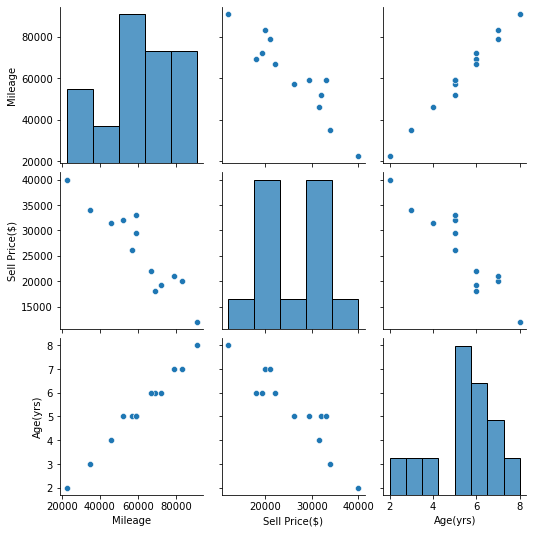

In [48]:
sns.pairplot(df_carprice)

In [50]:
car_dumies = pd.get_dummies(df_carprice["Car Model"])
car_dumies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [53]:
car_data = pd.concat([df_carprice, car_dumies], axis = 1)
car_data

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [56]:
car_model = linear_model.LinearRegression()
car_model.fit(car_data[["Mileage", "Age(yrs)", "Audi A5", "BMW X5", "Mercedez Benz C class" ]], car_data["Sell Price($)"])

LinearRegression()

In [57]:
car_model.score(car_data[["Mileage", "Age(yrs)", "Audi A5", "BMW X5", "Mercedez Benz C class" ]], car_data["Sell Price($)"])

0.9417050937281082

In [59]:
car_model.predict([[45000,4,0,0,1]])

array([36991.31721061])